In [1]:
import pandas as pd
import plotly as ply
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as stats
import numpy as np 


1. battery_power: The battery power of the mobile phone, typically measured in mAh (milliampere-hour). It represents the capacity of the battery and determines how long the phone can last on a single charge.

2. blue: A binary feature indicating whether the phone supports Bluetooth connectivity. It has a value of 1 if Bluetooth is supported and 0 if not.

3. clock_speed: The speed of the processor clock, usually measured in GHz (gigahertz). It indicates how quickly the processor can execute instructions.

4. dual_sim: A binary feature indicating whether the phone has dual SIM card support. It has a value of 1 if dual SIM support is available and 0 if not.

5. fc: The primary camera resolution of the phone, measured in megapixels (MP). It represents the quality and resolution of the photos captured by the phone's primary camera.

6. four_g: A binary feature indicating whether the phone supports 4G network connectivity. It has a value of 1 if 4G is supported and 0 if not.

7. int_memory: The internal memory (RAM) of the phone, typically measured in gigabytes (GB). It represents the amount of memory available for storing apps, data, and other files.

8. m_dep: The mobile depth or thickness of the phone, usually measured in centimeters (cm). It indicates how slim or thick the phone is.

9. mobile_wt: The weight of the phone, usually measured in grams (g). It represents the physical weight of the device.

10. n_cores: The number of processor cores in the phone's CPU (Central Processing Unit). It indicates the multitasking capabilities and overall performance of the processor.

11. pc: The pixel resolution of the phone's secondary camera, measured in megapixels (MP). It represents the quality and resolution of the photos captured by the phone's secondary (front-facing) camera.

12. px_height: The height of the phone's display screen in pixels. It represents the vertical resolution of the screen.

13. px_width: The width of the phone's display screen in pixels. It represents the horizontal resolution of the screen.

14. ram: The Random Access Memory (RAM) of the phone, usually measured in gigabytes (GB). It represents the amount of memory available for running apps and processes.

15. sc_h: The height of the phone's screen in centimeters (cm). It represents the physical height of the display screen.

16. sc_w: The width of the phone's screen in centimeters (cm). It represents the physical width of the display screen.

17. talk_time: The talk time of the phone, typically measured in hours. It represents the maximum duration for which the phone can be used for voice calls on a single charge.

18. three_g: A binary feature indicating whether the phone supports 3G network connectivity. It has a value of 1 if 3G is supported and 0 if not.

19. touch_screen: A binary feature indicating whether the phone has a touchscreen display. It has a value of 1 if the phone has a touchscreen and 0 if not.

20. wifi: A binary feature indicating whether the phone supports Wi-Fi connectivity. It has a value of 1 if Wi-Fi is supported and 0 if not.

21. price_range: The price range category of the mobile phone, which typically categorizes phones into different price brackets or tiers. It's often used as the target variable for machine learning models predicting the price range of a phone based on its features.

In [37]:
df_mobile = pd.read_csv("train.csv")

In [6]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df_mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df_mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df_mobile.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Statistical Analysis With NumPy And SciPy:
--

Execute detailed statistical analysis on each feature, including:
- Calculation of central tendency measures (mean, median, mode).
- Analysis of variability (range, variance, standard deviation).
- Evaluation of distribution shapes through skewness and kurtosis.

In [13]:
columns = df_mobile.columns

In [19]:
for column in columns:
    col_mean = np.mean(df_mobile[column])
    col_median = np.median(df_mobile[column])
    col_var = np.var(df_mobile[column])
    col_std = np.std(df_mobile[column])
    col_mode,number_of_elem = stats.mode(df_mobile[column])
    print(f'Statistics for {column}:\nmean: {col_mean}\nmedian: {col_median}\nvariance:{col_var}\nstandard deviation: {col_std}\nmode: {col_mode}')
    print('--------')

Statistics for battery_power:
mean: 1238.5185
median: 1226.0
variance:192991.81565775
standard deviation: 439.3083377967575
mode: 618
--------
Statistics for blue:
mean: 0.495
median: 0.0
variance:0.24997499999999997
standard deviation: 0.4999749993749687
mode: 0
--------
Statistics for clock_speed:
mean: 1.52225
median: 1.5
variance:0.6655299375
standard deviation: 0.8158001823363366
mode: 0.5
--------
Statistics for dual_sim:
mean: 0.5095
median: 1.0
variance:0.24990975
standard deviation: 0.499909741853467
mode: 1
--------
Statistics for fc:
mean: 4.3095
median: 3.0
variance:18.838709749999996
standard deviation: 4.340358251342854
mode: 0
--------
Statistics for four_g:
mean: 0.5215
median: 1.0
variance:0.24953775000000003
standard deviation: 0.49953753612716634
mode: 1
--------
Statistics for int_memory:
mean: 32.0465
median: 32.0
variance:329.10233775
standard deviation: 18.141177959272657
mode: 27
--------
Statistics for m_dep:
mean: 0.50175
median: 0.5
variance:0.083141937500000

In [28]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for the column

for el in df_mobile:
    close_skewness = skew(df_mobile[el])
    close_kurtosis = kurtosis(df_mobile[el])

    print(f"Skewness of {el} column:", close_skewness)
    print(f"Kurtosis of {el} column:", close_kurtosis)
    print('------')

Skewness of battery_power column: 0.03187454295305568
Kurtosis of battery_power column: -1.224084165725428
------
Skewness of blue column: 0.02000100007500624
Kurtosis of blue column: -1.9995999599959997
------
Skewness of clock_speed column: 0.17795052935349268
Kurtosis of clock_speed column: -1.3231094949498647
------
Skewness of dual_sim column: -0.03800686085763292
Kurtosis of dual_sim column: -1.9985554785277484
------
Skewness of fc column: 1.0190463925723268
Kurtosis of fc column: 0.27338561771466496
------
Skewness of four_g column: -0.08607961742649396
Kurtosis of four_g column: -1.9925902994637084
------
Skewness of int_memory column: 0.05784590180779676
Kurtosis of int_memory column: -1.2160344731958939
------
Skewness of m_dep column: 0.08901518436117652
Kurtosis of m_dep column: -1.2741637414186793
------
Skewness of mobile_wt column: 0.0065532377855500356
Kurtosis of mobile_wt column: -1.2103511507234548
------
Skewness of n_cores column: 0.0036247871155484306
Kurtosis of

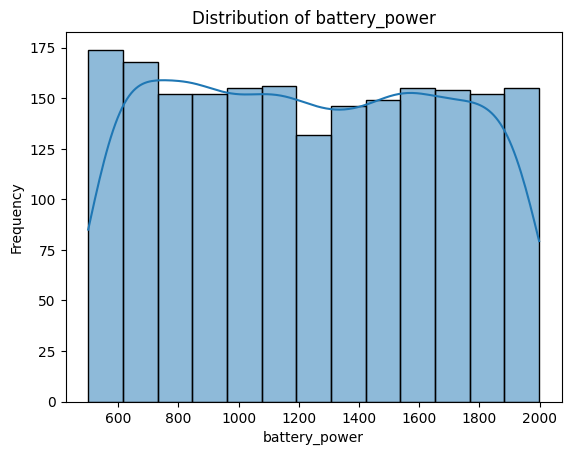

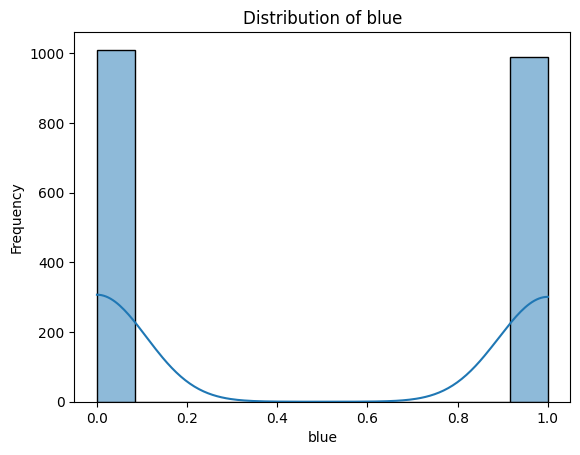

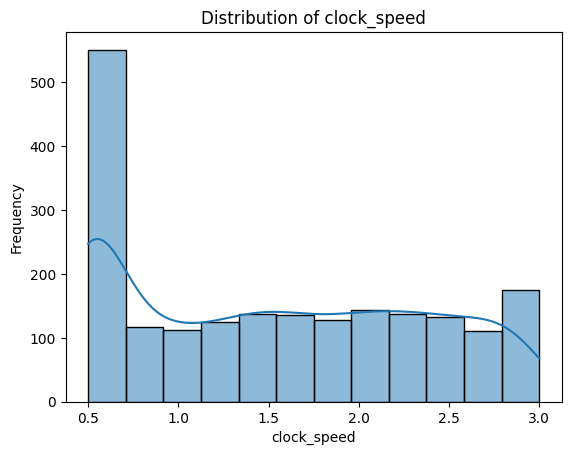

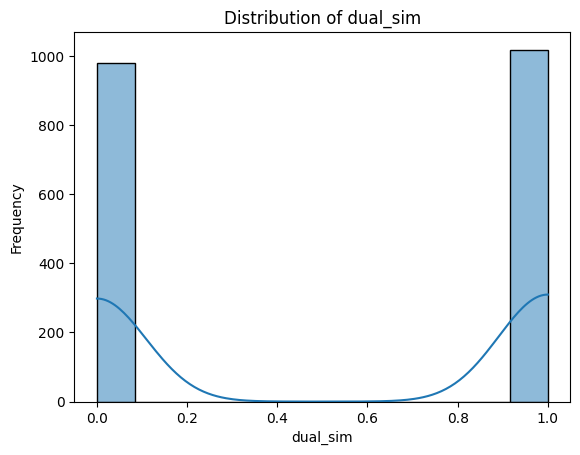

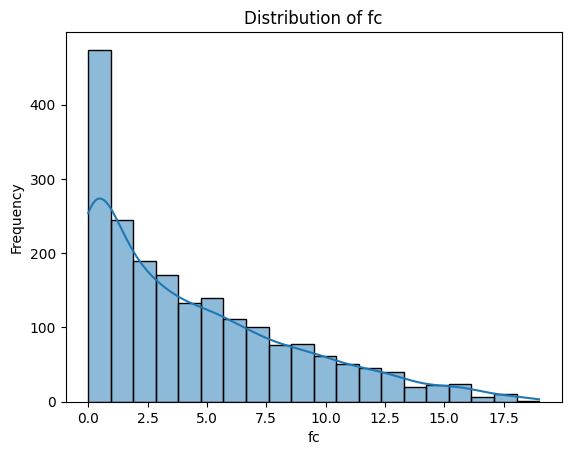

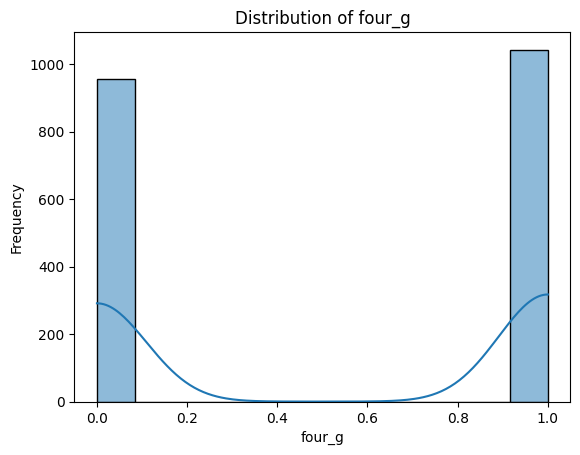

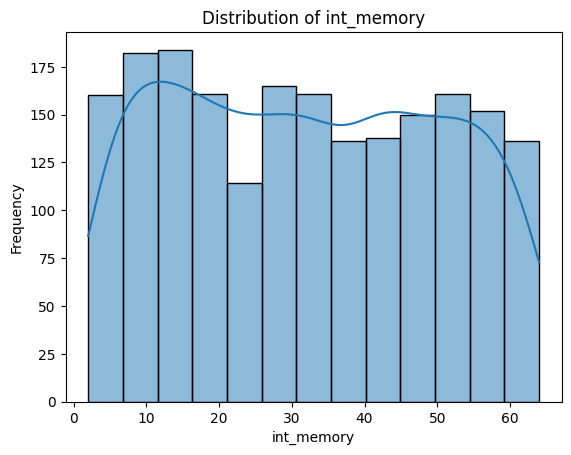

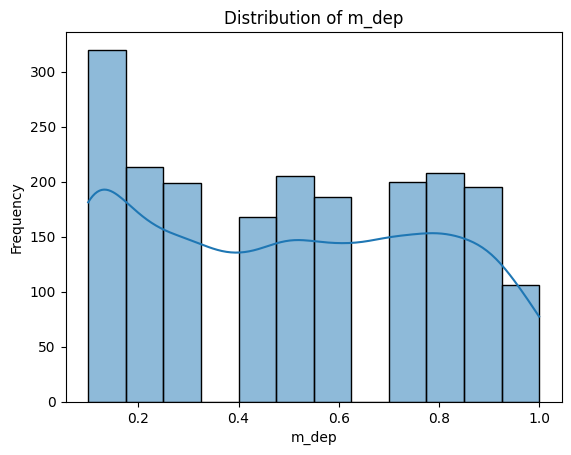

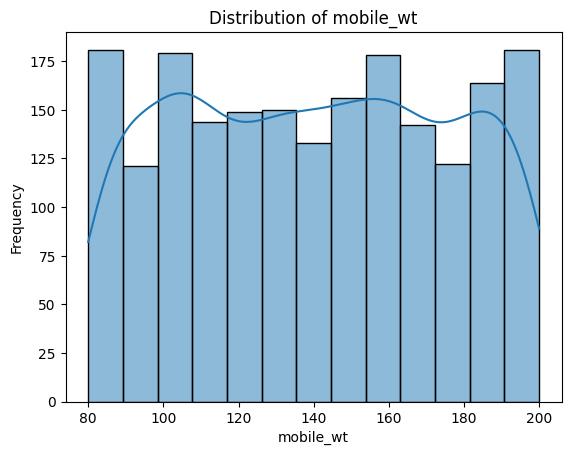

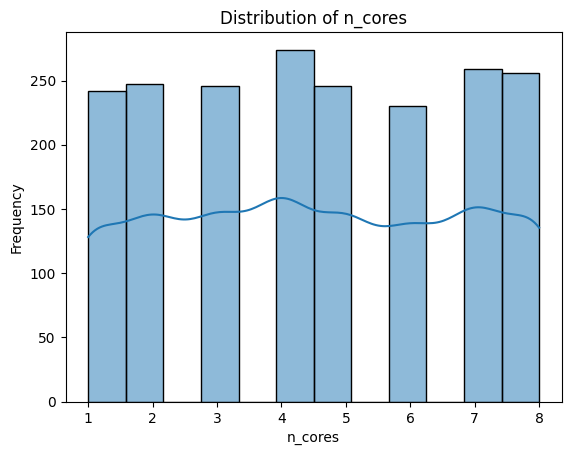

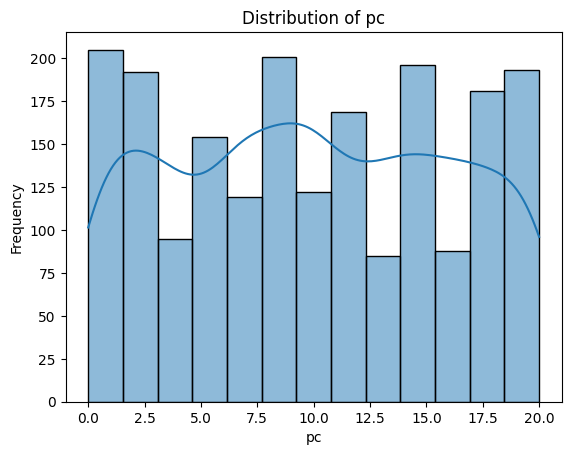

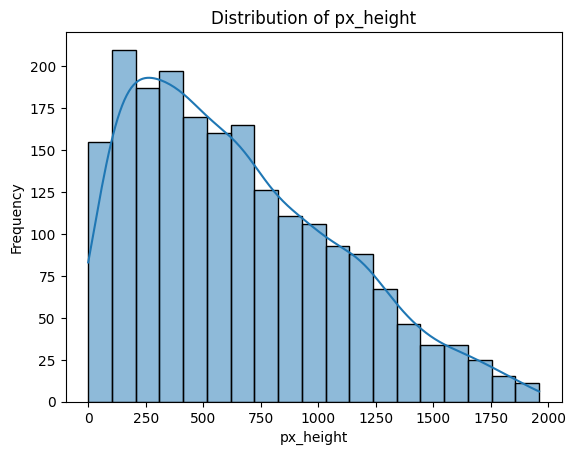

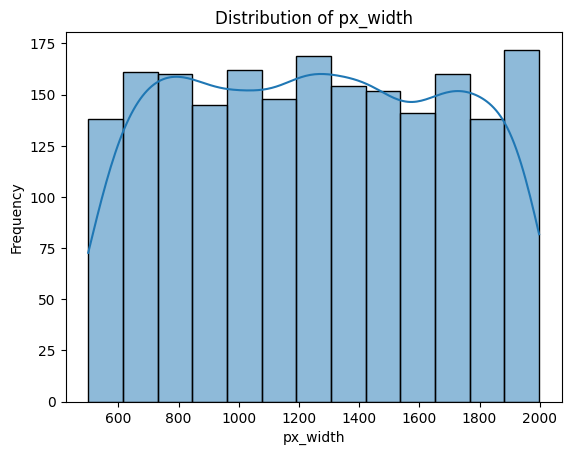

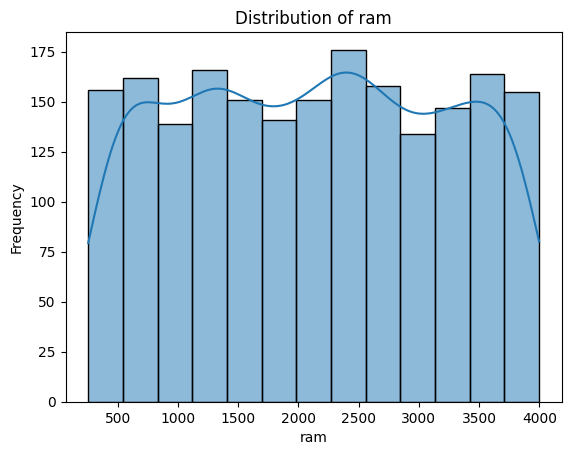

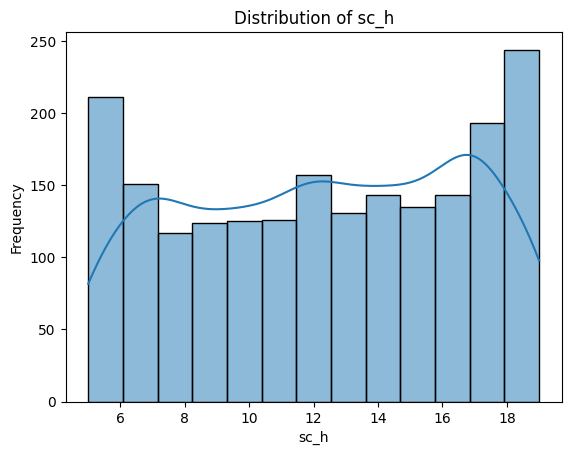

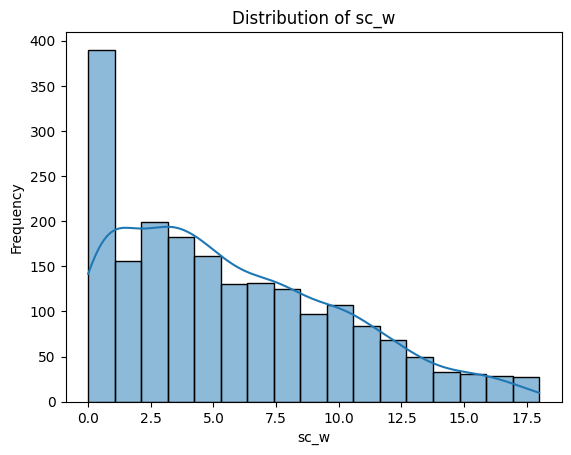

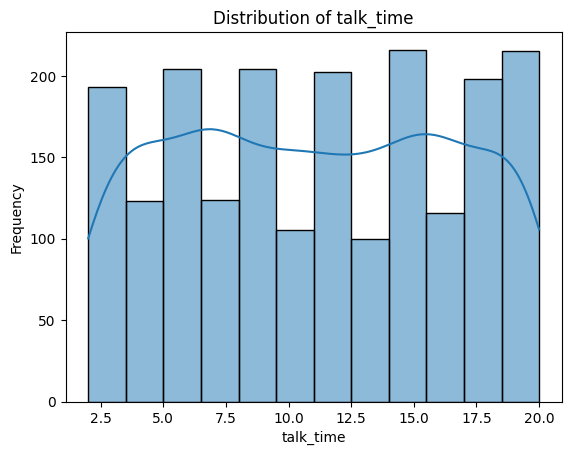

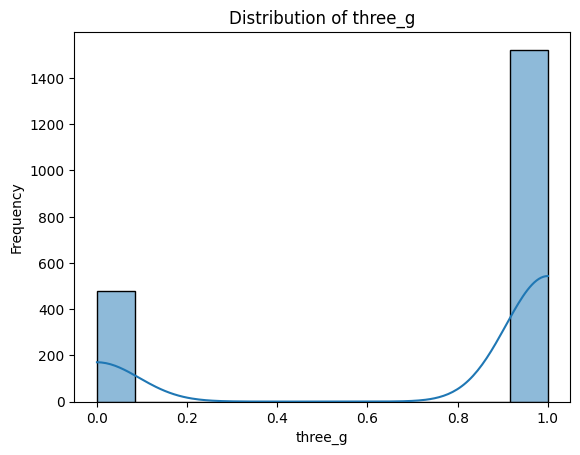

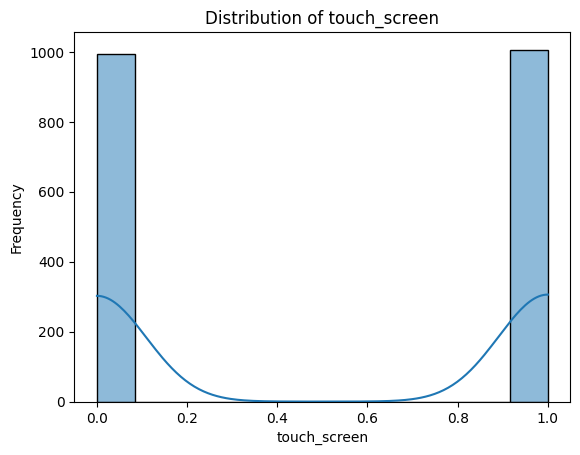

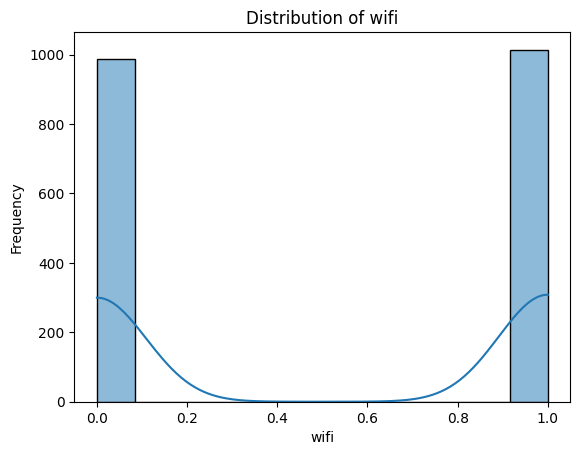

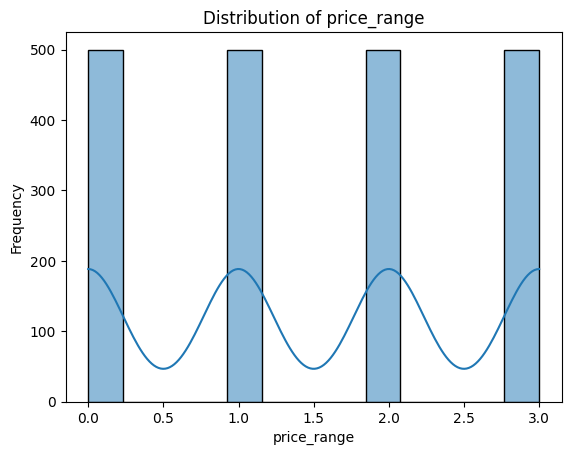

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in the dataset
for column in df_mobile.columns:
    # Create a distribution plot for the column
    sns.histplot(df_mobile[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [30]:
df_mobile['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [52]:
price_range_0 = df_mobile[df_mobile['price_range'] == 0]
price_range_1 = df_mobile[df_mobile['price_range'] == 1]
price_range_2 = df_mobile[df_mobile['price_range'] == 2]
price_range_3 = df_mobile[df_mobile['price_range'] == 3]

# Perform hypothesis testing for each numerical feature
for column in df_mobile.select_dtypes(include=np.number):
  stat, p_value = stats.shapiro(df_mobile[column])
  if p_value > 0.05:
    f_stat, p_value = stats.f_oneway(price_range_0[column], price_range_1[column], price_range_2[column], price_range_3[column])
    if p_value < 0.05:
      print(f"Significant difference in {column} across price ranges (p-value: {p_value})")
  else:
    # Not normally distributed data
    # Perform Kruskal-Wallis test for comparing multiple groups
    stat, p_value = stats.kruskal(price_range_0[column], price_range_1[column], price_range_2[column], price_range_3[column])
    if p_value < 0.05:
      print(f"Significant difference in {column} across price ranges (p-value: {p_value})")

# Perform chi-square test for categorical features
for column in df_mobile.select_dtypes(include='object'):
  # Create a contingency table
  crosstab = pd.crosstab(df_mobile['price_range'], df_mobile[column])
  stat, p_value, _, _ = stats.chi2_contingency(crosstab)
  if p_value < 0.05:
    print(f"Significant association between {column} and price range (p-value: {p_value})")

Significant difference in battery_power across price ranges (p-value: 2.0483291081148915e-19)
Significant difference in int_memory across price ranges (p-value: 0.032533148942589206)
Significant difference in mobile_wt across price ranges (p-value: 0.012744503689937405)
Significant difference in n_cores across price ranges (p-value: 0.04859242925831929)
Significant difference in px_height across price ranges (p-value: 3.180105022964664e-10)
Significant difference in px_width across price ranges (p-value: 4.4770998222327646e-14)
Significant difference in ram across price ranges (p-value: 0.0)
Significant difference in price_range across price ranges (p-value: 0.0)


In [57]:
numerical_columns = df_mobile.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df_mobile_normalized = df_mobile.copy()
df_mobile_normalized[numerical_columns] = scaler.fit_transform(df_mobile_normalized[numerical_columns])

for column in numerical_columns:
    # Filter the DataFrame by price_range == 0 for the current column
    price_range_0 = df_mobile_normalized[df_mobile_normalized['price_range'] == 0][column]
    # Filter the DataFrame by price_range == 1 for the current column
    price_range_1 = df_mobile_normalized[df_mobile_normalized['price_range'] == 1][column]
    # Filter the DataFrame by price_range == 2 for the current column
    price_range_2 = df_mobile_normalized[df_mobile_normalized['price_range'] == 2][column]
    # Filter the DataFrame by price_range == 3 for the current column
    price_range_3 = df_mobile_normalized[df_mobile_normalized['price_range'] == 3][column]
    
    # Check if any of the filtered DataFrames are empty
    if not price_range_0.empty and not price_range_1.empty and not price_range_2.empty and not price_range_3.empty:
        # Perform ANOVA (Analysis of Variance) test
        f_stat, p_value = stats.f_oneway(price_range_0, price_range_1, price_range_2, price_range_3)
        # Check if the p-value is less than 0.05 (indicating a significant difference)
        if p_value < 0.05:
            print(f"Significant difference in {column} across price ranges (p-value: {p_value})")


In [54]:
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway
for column in numerical_columns:
    pearson_corr, pearson_pvalue = pearsonr(df_mobile_normalized[column], df_mobile_normalized['price_range'])
    print(f"Pearson correlation between {column} and price_range: {pearson_corr}, p-value: {pearson_pvalue}")

# Calculate Spearman correlation coefficient and p-value for each numerical feature
for column in numerical_columns:
    spearman_corr, spearman_pvalue = spearmanr(df_mobile_normalized[column], df_mobile_normalized['price_range'])
    print(f"Spearman correlation between {column} and price_range: {spearman_corr}, p-value: {spearman_pvalue}")

# Apply advanced statistical tests between features and target
for column in numerical_columns:
    # Example: T-test for two independent samples (price_range = 0 vs. price_range = 1)
    t_stat, t_pvalue = ttest_ind(df_mobile_normalized[df_mobile_normalized['price_range'] == 0][column],
                                  df_mobile_normalized[df_mobile_normalized['price_range'] == 1][column])
    print(f"T-test for {column} between price_range 0 and 1: t-statistic: {t_stat}, p-value: {t_pvalue}")

    # Example: Mann-Whitney U test for two independent samples (price_range = 0 vs. price_range = 1)
    mwu_stat, mwu_pvalue = mannwhitneyu(df_mobile_normalized[df_mobile_normalized['price_range'] == 0][column],
                                         df_mobile_normalized[df_mobile_normalized['price_range'] == 1][column])
    print(f"Mann-Whitney U test for {column} between price_range 0 and 1: U-statistic: {mwu_stat}, p-value: {mwu_pvalue}")

# Example: One-way ANOVA for comparing means across multiple groups
f_stat, f_pvalue = f_oneway(df_mobile_normalized[df_mobile_normalized['price_range'] == 0][numerical_columns],
                             df_mobile_normalized[df_mobile_normalized['price_range'] == 1][numerical_columns],
                             df_mobile_normalized[df_mobile_normalized['price_range'] == 2][numerical_columns],
                             df_mobile_normalized[df_mobile_normalized['price_range'] == 3][numerical_columns])
print(f"One-way ANOVA F-statistic: {f_stat}, p-value: {f_pvalue}")

Pearson correlation between battery_power and price_range: 0.200722612113731, p-value: 1.264854239221993e-19
Pearson correlation between blue and price_range: 0.020572854061418473, p-value: 0.35779848989488716
Pearson correlation between clock_speed and price_range: -0.006605690881732066, p-value: 0.7678151230141631
Pearson correlation between dual_sim and price_range: 0.017444479237224766, p-value: 0.4355601630195056
Pearson correlation between fc and price_range: 0.021998207776904276, p-value: 0.32546291239499214
Pearson correlation between four_g and price_range: 0.01477171141723941, p-value: 0.5091036529765829
Pearson correlation between int_memory and price_range: 0.04443495938898745, p-value: 0.04693006243458603
Pearson correlation between m_dep and price_range: 0.0008530365050864464, p-value: 0.9695879315854061
Pearson correlation between mobile_wt and price_range: -0.03030217131438641, p-value: 0.17553925104901968
Pearson correlation between n_cores and price_range: 0.004399274

c:\Users\v_gol\Desktop\Developers Institute\GitHub\DI-Bootcamp\my_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\v_gol\AppData\Local\Temp\ipykernel_22944\2979809827.py:25: DegenerateDataWarning: at least one input has length 0
  f_stat, f_pvalue = f_oneway(df_mobile_normalized[df_mobile_normalized['price_range'] == 0][numerical_columns],


From the correlation analysis and hypothesis testing conducted between various features and the price range of mobile phones, several key insights can be drawn:

Battery Power: There is a moderately positive correlation between battery power and price range (Pearson correlation: 0.201, Spearman correlation: 0.200). Higher-priced phones tend to have higher battery power.

Internal Memory (int_memory): There is a weak positive correlation between internal memory and price range (Pearson correlation: 0.044, Spearman correlation: 0.044). Higher-priced phones tend to offer more internal memory.

RAM: There is a strong positive correlation between RAM and price range (Pearson correlation: 0.917, Spearman correlation: 0.917). Higher-priced phones tend to have more RAM, which is a significant factor influencing price.

Screen Resolution (px_height and px_width): Both pixel height and pixel width show moderate positive correlations with price range (Pearson correlation: 0.149 and 0.166 for px_height and px_width respectively, Spearman correlation: 0.132 and 0.165). Higher-priced phones typically have higher screen resolutions.

Other Features: Most other features, such as clock speed, number of cores, and presence of features like blue, dual SIM, and 4G, show weak correlations with price range.

Hypothesis Testing: T-tests and Mann-Whitney U tests confirm significant differences in several features across different price ranges. For example, there are significant differences in battery power, internal memory, and screen resolution between different price range categories.

In summary, RAM, battery power, and screen resolution are strong indicators of a mobile phone's price range. Higher-priced phones generally offer better performance, higher storage capacity, and sharper displays. Other features like dual SIM and 4G capability do not show strong correlations with price range, indicating that they may not significantly influence pricing decisions.

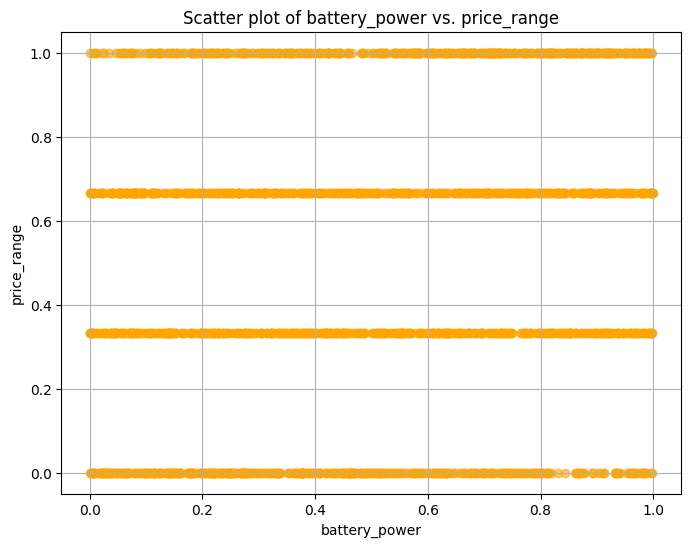

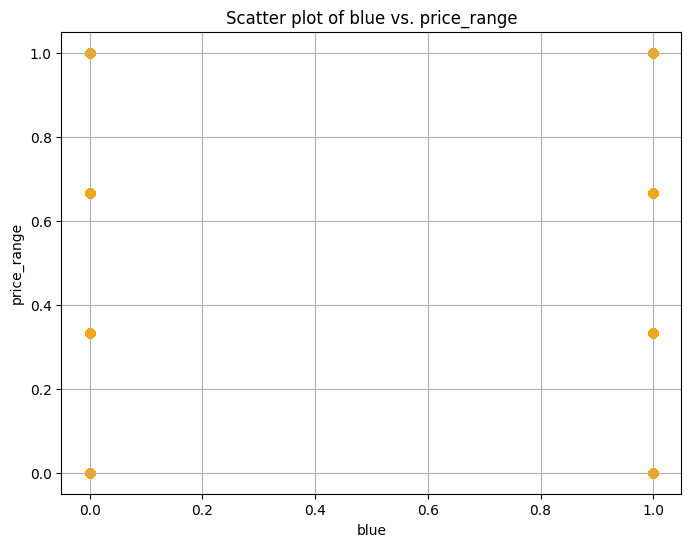

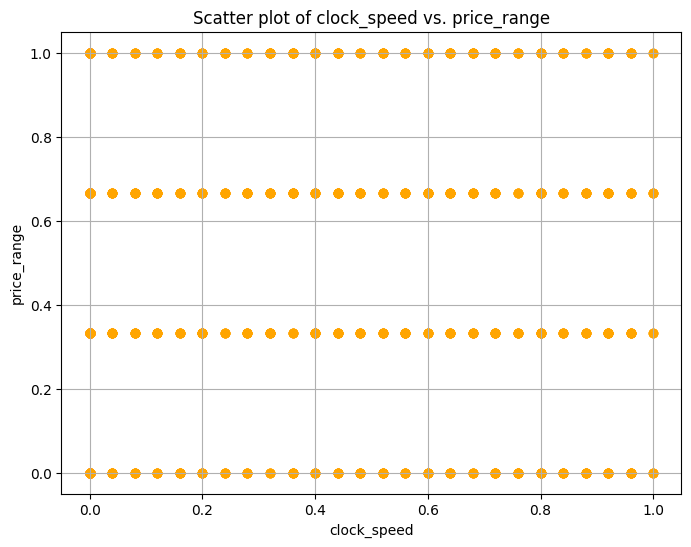

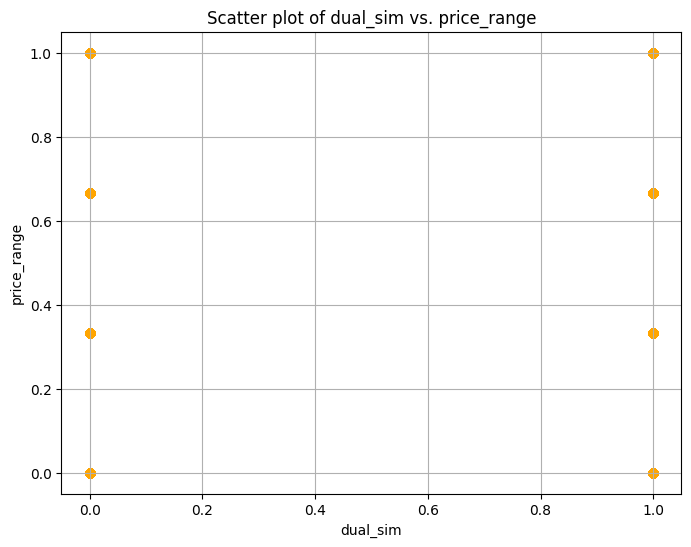

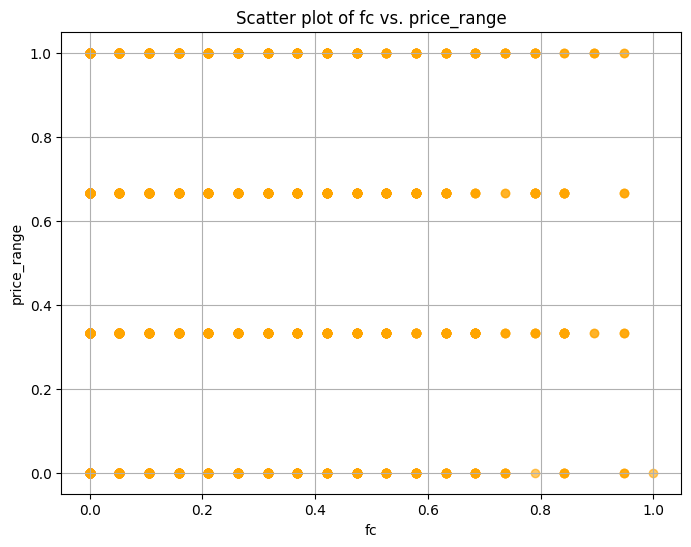

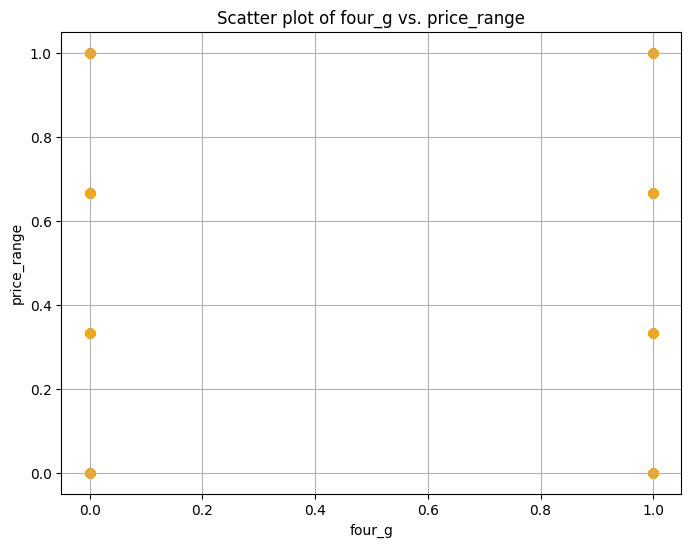

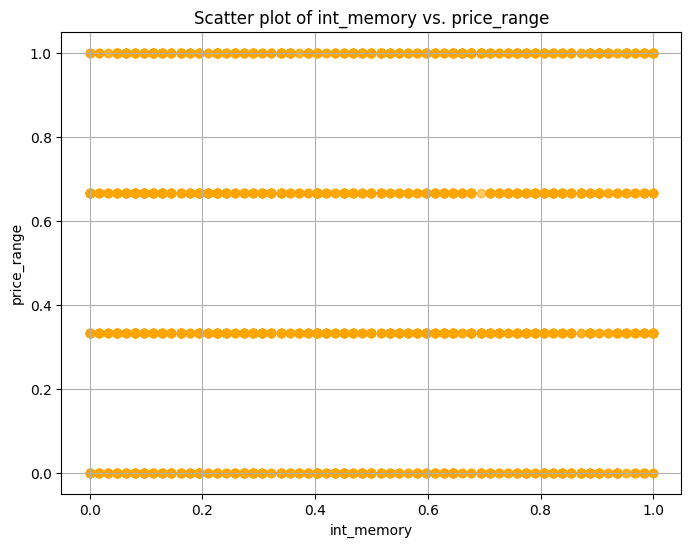

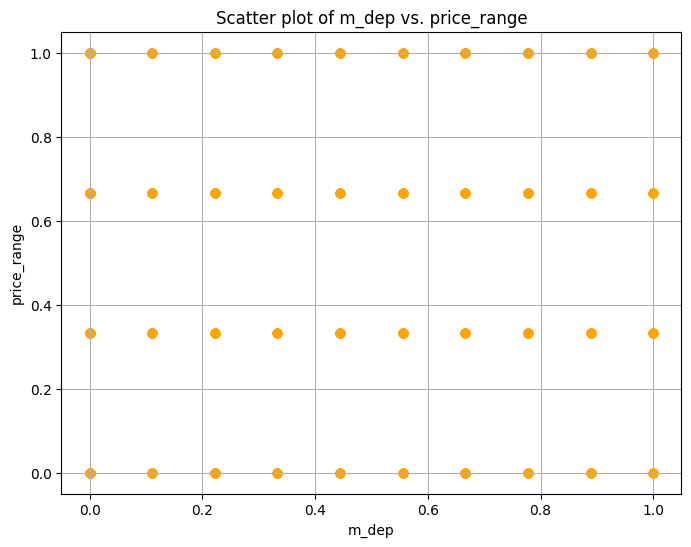

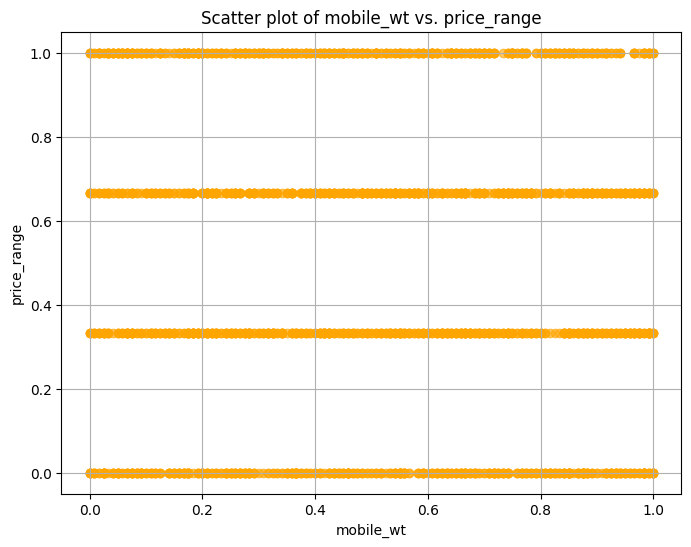

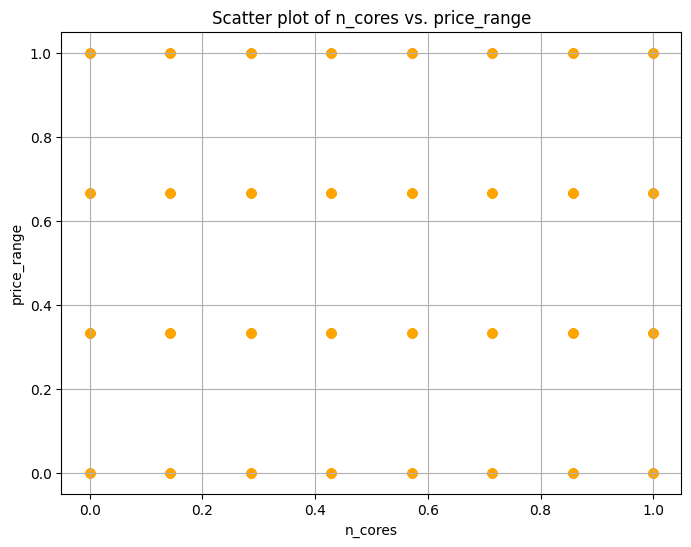

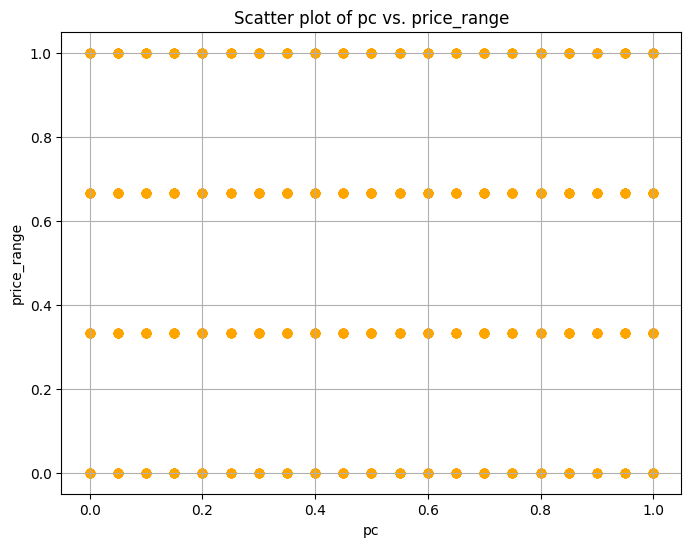

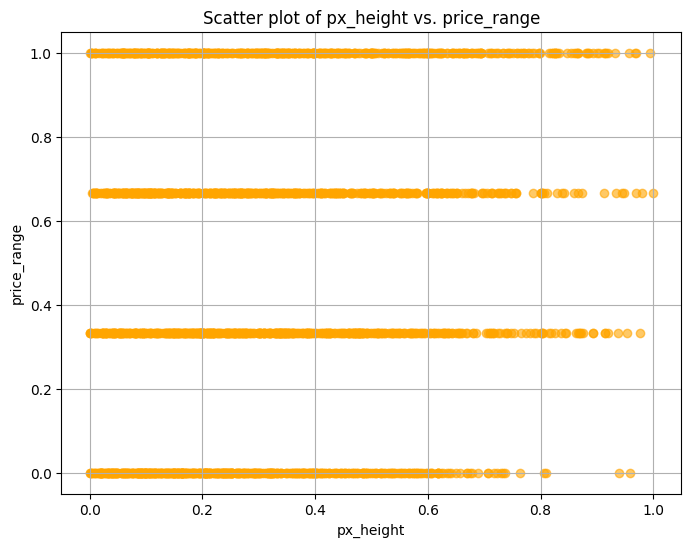

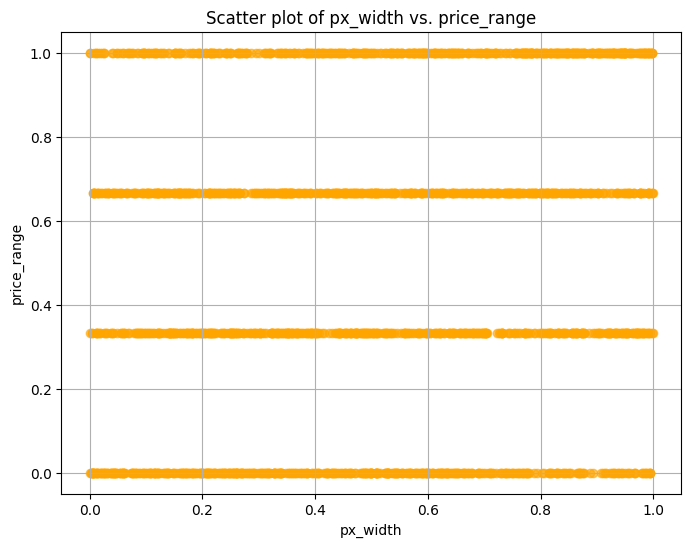

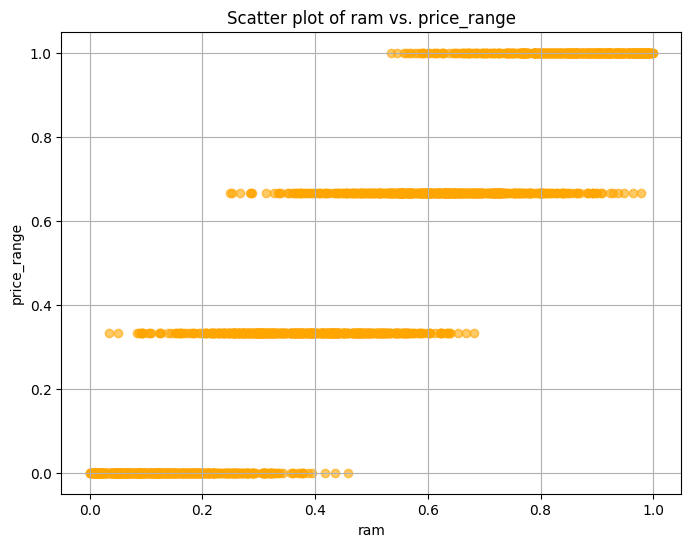

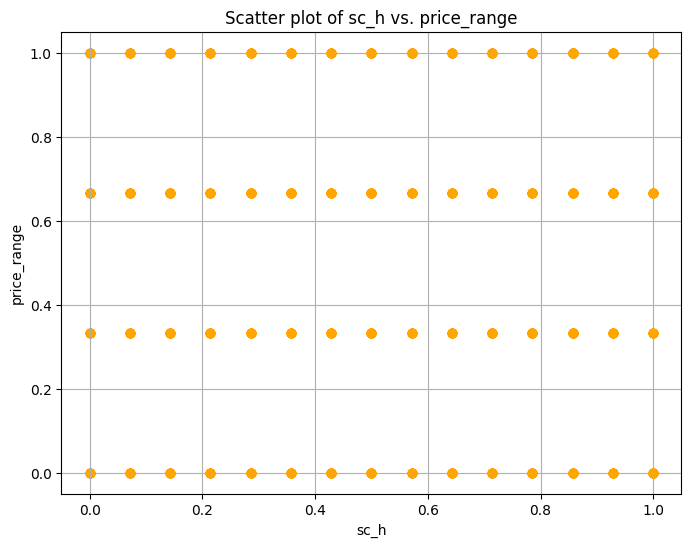

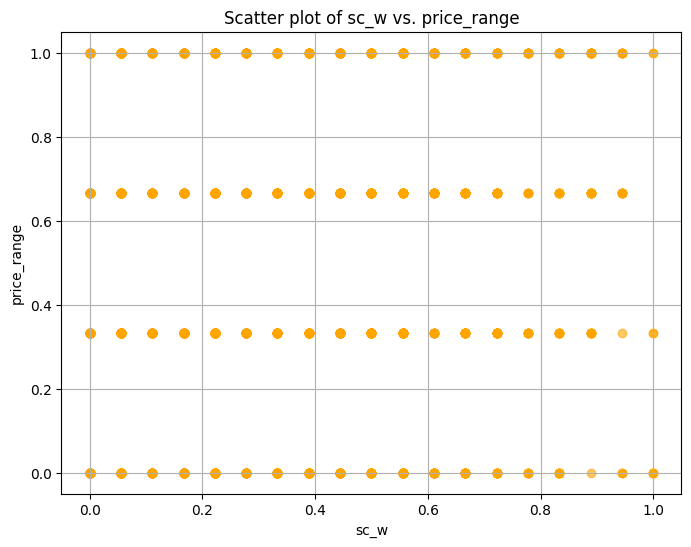

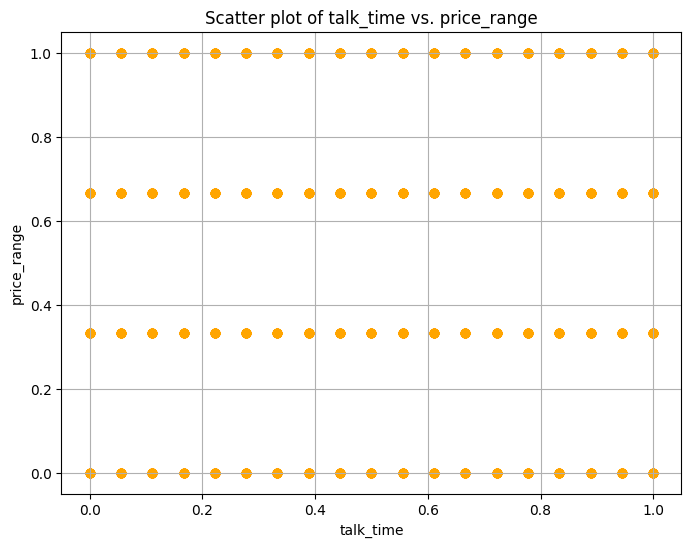

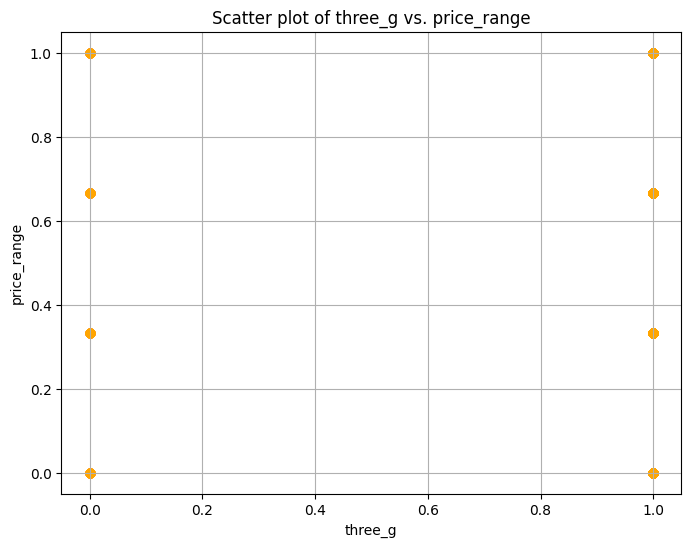

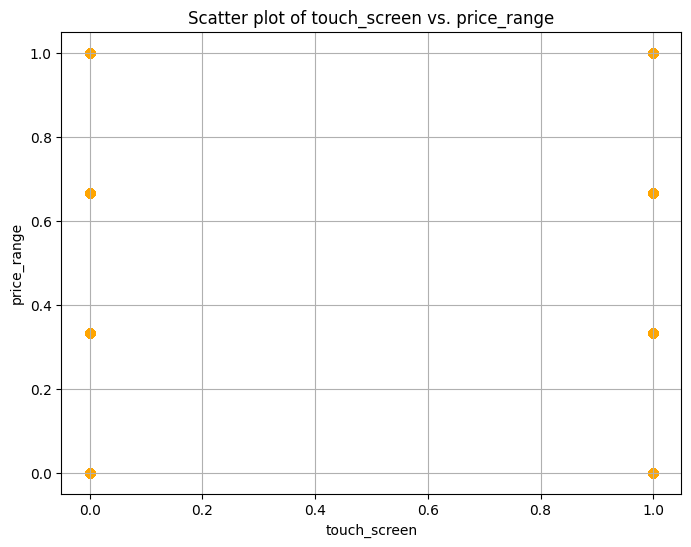

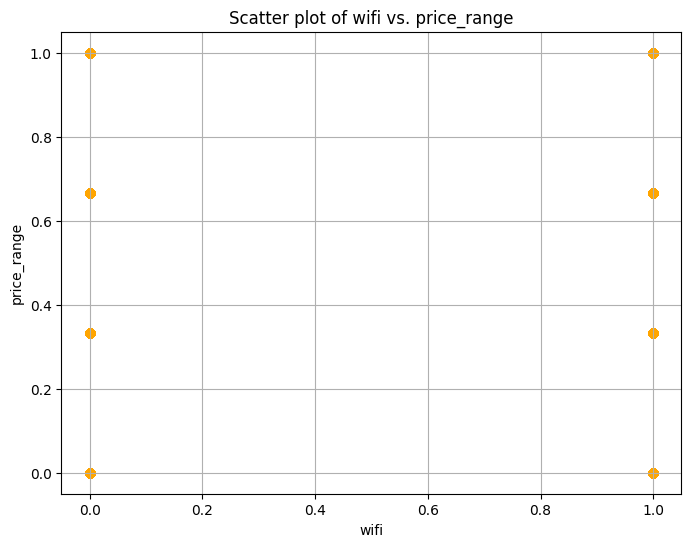

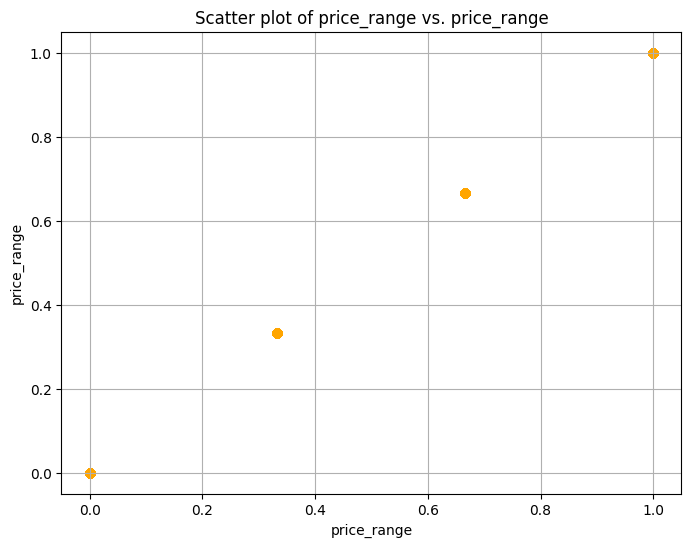

In [56]:
# Scatter plots between numerical features and target variable
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_mobile_normalized[column], df_mobile_normalized['price_range'], color='orange', alpha=0.6)
    plt.title(f'Scatter plot of {column} vs. price_range')
    plt.xlabel(column)
    plt.ylabel('price_range')
    plt.grid(True)
    plt.show()


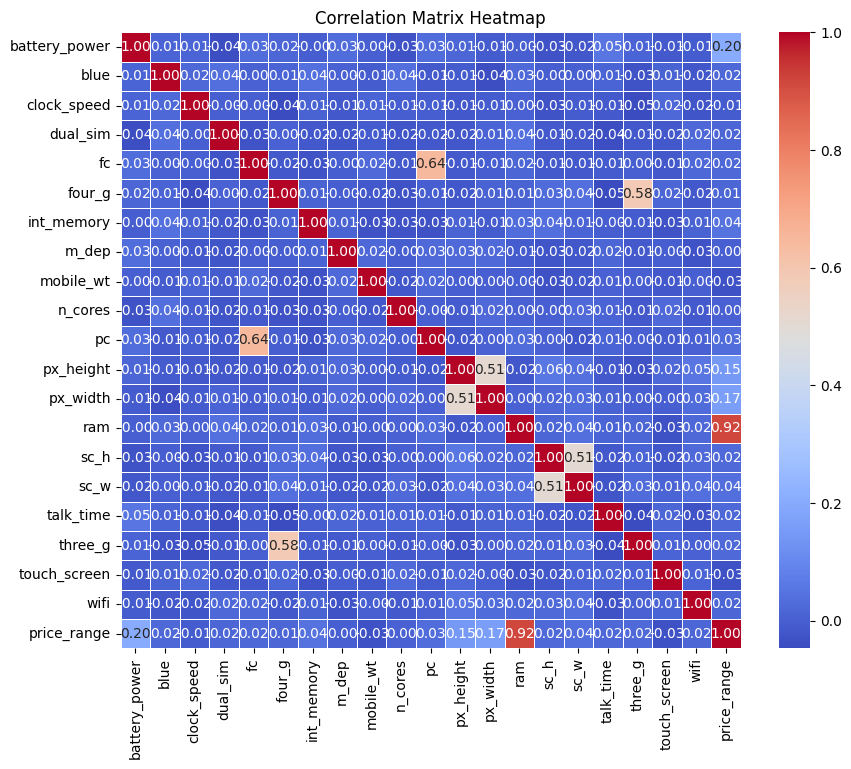

In [58]:
# Correlation matrix heatmap
correlation_matrix = df_mobile_normalized[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


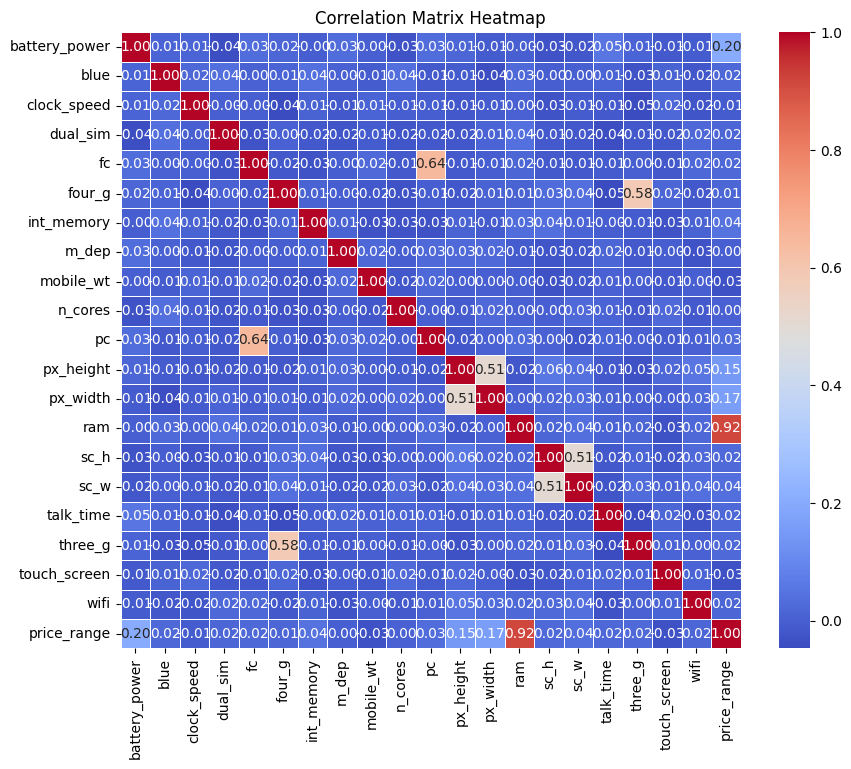

In [59]:
# Correlation matrix heatmap
correlation_matrix = df_mobile[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
